In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%reset -f
import warnings
warnings.filterwarnings('ignore')

In [3]:
import string
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
#NLTK
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

# Keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, Activation,GlobalMaxPooling1D
from keras import regularizers
from keras.layers import Concatenate

from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


# 1. Import & Preprocess Data

In [12]:
# Read Data Frame
df = pd.read_csv('EERI_Data.csv',usecols=[0,1], encoding = "ISO-8859-1",header=None,skiprows=[0])
df.columns=['label','text']
df.head(10)
print("The number of original data is: {}".format(df.shape[0]))
df.label=df.label.astype('str')
df.describe()

,label,text
6652,1,Owner doesn't want GREEN tag
6780,2,around chimney & S.E. side of dwelling
415,3,Damaged 3 story office building.
2574,3,Collapsed residential building and public mark...
526,3,Damaged 3 story office building.
4941,2,chimney
572,3,"Marketplace partial collapse, 4 story building."
5126,1,(Annette's Chocolates)
6713,1,(Amigos Market) - hot water bracing required
611,2,Damaged 3 story office building.


The number of original data is: 7043


,label,text
count,7043,7043
unique,3,2362
top,3,Damaged 3 story office building.
freq,2554,371


In [14]:
df.sample(15)

,label,text
3630,2,brick veneer cracked and bowing outward - fall...
4026,2,do not occupy or utilize interior/exterior are...
3036,2,Juojhen District Office; Structural failure of...
5690,1,(Ulta Beauty & Panera)
6993,1,Damage on the facade and canopy. Glass shattered.
4056,2,east side of bldg façade
1492,3,Yujing Junior High
3901,3,Chimney through roof
3138,1,24-story residential building; structural fail...
2529,1,Soil Liquefaction


In [15]:
# Clean Original Data
def clean_text(text):
    ## Convert words to lower case
    text = text.lower()
    
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\-", " ", text)
    text = re.sub(r"stories", "story", text)   
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " ", text)
    text = re.sub(r"\×", " ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " ", text)
    text = re.sub(r" rd ", " road ", text)
    text = re.sub(r" st ", " street ", text)
    ## Remove stop words
    text = text.split()
    #stops = set(stopwords.words("english"))
    #text = [w for w in text if not w in stops and (len(w) >= 3 or w.isnumeric())]
    text = [w for w in text if (len(w) >= 3 or w.isnumeric())]
    text = " ".join(text)
    ## Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    ## Stemming (No stem here)
    #text = text.split()
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(word) for word in text]
    #text = " ".join(stemmed_words)
    return text
# apply the above function to df['text']
df['text'] = df['text'].map(lambda x: clean_text(x))

In [16]:
# Remove the duplicate rows
df.drop_duplicates(subset = ['text'],inplace=True)

In [17]:
# Remove non-numeric and empty texts
df= df.dropna()
df = df[df.label.apply(lambda x: x.isnumeric())]
df = df[df.label.apply(lambda x: x !=" ")]
df = df[df.label.apply(lambda x: x !="")]
df = df[df.text.apply(lambda x: x !=" ")]
df = df[df.text.apply(lambda x: x !="")]
df.describe()
#df['text'][1900]
#df['text'][2533]

,label,text
count,2308,2308
unique,3,2308
top,2,collapsed structure
freq,1244,1


In [18]:
df.head(10)

,label,text
0,3,toppled building with 11 story and one story b...
1,3,the base three floors collapsed
2,3,the base three floors were the bank the above ...
3,3,the toppled building leaning the two story old...
4,3,toppled building with 17 story and one story b...
5,3,the south wing broke between and
6,3,the southwest corner column
7,3,break section the south wing
8,3,break section the north wing
9,3,exposed column reinforcing bars the north brea...


In [24]:
df.sample(15)

,label,text
1938,3,structural failure columns tainan municipal yu...
5313,1,docs trophy shoppe
5461,2,wells fargo bank wall ceiling floor finishes r...
5356,1,minor foundation cracks minor crack the drywal...
2556,3,collapsed commercial building 10 floors
4026,2,not occupy utilize interior exterior areas adj...
6593,2,chimy from neighbor 1745 olypmia leaning towar...
4736,2,failure roof beam wall connections
6933,3,damage state highway 1 approach parnassus over...
5791,2,support required for back chimney flue


# 2. Construct train and test data for imbalanced data

In [338]:
# Check the distribution of data
c = Counter(df.label)
print(c)
# We seperate the data for each label
df1=df.loc[df['label'] == '1']
df2=df.loc[df['label'] == '2']
df3=df.loc[df['label']=='3']
# Split the train and test data for each label
train_df1,test_df1=train_test_split(df1, test_size=0.15,random_state=100)
train_df2,test_df2=train_test_split(df2, test_size=0.15,random_state=100)
train_df3,test_df3=train_test_split(df3, test_size=0.15,random_state=100)
# Customize the number of train and test for each label
summary=pd.DataFrame([[train_df1.shape[0], train_df2.shape[0], train_df3.shape[0]],
                   [test_df1.shape[0], test_df2.shape[0], test_df3.shape[0]]],
                   index=['Train','Test'],
                   columns=['Green', 'Yellow', 'Red'])
summary
## Construct new balanced training data
train_df=pd.concat([train_df1,train_df2,train_df3],axis=0)
test_df=pd.concat([test_df1,test_df2,test_df3],axis=0)
train_df.head(10)
test_df.head(10)

Counter({'2': 1244, '1': 822, '3': 242})


,Green,Yellow,Red
Train,698,1057,205
Test,124,187,37


,label,text
4031,1,sperficial cracking nook bedroomes 1st floor b...
5638,1,slab foundation addition move 3 8 plaster crac...
3754,1,should review foundation and stem wall
6650,1,cosmetic stucco cracks around some windows ent...
6307,1,green tag minor interior cracking plaster
4594,1,minor cracking exterior cement plaster
4459,1,not home upgraded red for cmu wall only
4830,1,sizzler
5428,1,placard placed apparent structural damage
5711,1,henry yellow green occupy


,label,text
5488,1,interior gyp board cracking minor
6055,1,green tag superficial exterior stuccon cracks ...
6756,1,interior gyp board cracking exterior stucco cr...
3196,1,rear unit 921 bldg stucco about 6 above sill d...
6385,1,cracking cmu corners cracking corner cmu fndn ...
3262,1,damage from
5244,1,owner apperas repair chimney cracks himself
6507,1,minor damage chimny brick arch arch removed da...
5608,1,hairline plaster cracks structure good
6226,1,damage ade tower


In [339]:
# Find the maximize length of sentence
df['length'] = df['text'].apply(lambda x: len(str(x).split(' ')))
print("mean length of sentence: " + str(df.length.mean()))
print("max length of sentence: " + str(df.length.max()))
print("std dev length of sentence: " + str(df.length.std()))

mean length of sentence: 7.923310225303293
max length of sentence: 82
std dev length of sentence: 5.396117739042596


# 3. Weight Balancing Based Model

### 3.1 Tokenize the text data

In [340]:
MAX_SEQUENCE_LENGTH = 82
MAX_NB_WORDS = 10000
EMBEDDING_DIM = 300

In [341]:
# Create sequence for train and test data
#vocabulary_size = 10000
tokenizer = Tokenizer(num_words= MAX_NB_WORDS)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
#print ('The vocabulary size is: {}'.format(len(word_index)))
print('Found %s unique tokens from corpus.' % len(word_index))

sequences_train = tokenizer.texts_to_sequences(train_df['text'].values)
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
y_train = np.array(train_df['label']).astype(int)-1
y_train_onehot = to_categorical(y_train)
print('the shape for training data is: {}'.format(X_train.shape))

sequences_test = tokenizer.texts_to_sequences(test_df['text'].values)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
y_test = np.array(test_df['label']).astype(int)-1
y_test_onehot= to_categorical(y_test)
print('the shape for test data is: {}'.format(X_test.shape))

Found 2549 unique tokens from corpus.
the shape for training data is: (1960, 82)
the shape for test data is: (348, 82)


### 3.2 Use pre-trained Glove word embeddings

In [342]:
embeddings_index = dict()
if EMBEDDING_DIM == 50:
    f = open('glove.6B.50d.txt',encoding="utf8")
elif EMBEDDING_DIM ==100:
    f = open('glove.6B.100d.txt',encoding="utf8")
else:
    f = open('glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Total %s word vectors in Glove.' % len(embeddings_index))

Total 400000 word vectors in Glove.


In [343]:
#embedding_matrix = np.zeros((MAX_NB_WORDS, EMBEDDING_DIM))
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, index in word_index.items():
    if index > MAX_NB_WORDS - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

### 3.3 Simple CNN Model 

In [358]:
def create_model(glove,activation,trainable,dropout=0.2,alpha=0.001,optimizer='adam'):
    model = Sequential()
    if glove:
        model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH,trainable=trainable))
    else:
        model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH,trainable=trainable))
    model.add(Conv1D(filters=16, kernel_size=1, activation=activation,kernel_regularizer=regularizers.l2(alpha)))
    #model.add(Conv1D(filters=16, kernel_size=1, activation=activation,kernel_regularizer=regularizers.l2(alpha)))
    model.add(MaxPooling1D(pool_size=82))
    model.add(Dropout(dropout))

    model.add(Conv1D(filters=32, kernel_size=2, activation=activation,kernel_regularizer=regularizers.l2(alpha)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout))

    model.add(Conv1D(filters=64, kernel_size=3, activation=activation,kernel_regularizer=regularizers.l2(alpha)))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Dropout(dropout))

    model.add(Conv1D(filters=128, kernel_size=2, activation=activation,kernel_regularizer=regularizers.l2(alpha)))
    model.add(MaxPooling1D(pool_size=5))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(32, activation=activation,kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dropout(dropout))

    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

### 3.3.1 Randomly Initialized Embedding

In [345]:
# Set the weight for each label
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
print('The weight for each lable in loss function is: {}'.format(class_weights))
#class_weights = {0: 1.,1: 1.,2: 3.}
model1=create_model(glove=False,activation='elu',trainable=True)
print("model fitting - simplified convolutional neural network")
model1.summary()
history1=model1.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50,batch_size=64,shuffle=True,verbose=2,class_weight=class_weights)
score=model1.predict(X_test)
y_pred1=np.argmax(score,axis=1)

The weight for each lable in loss function is: [0.93600764 0.61810155 3.18699187]
model fitting - simplified convolutional neural network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_201 (Embedding)    (None, 82, 300)           765000    
_________________________________________________________________
conv1d_518 (Conv1D)          (None, 82, 16)            4816      
_________________________________________________________________
max_pooling1d_456 (MaxPoolin (None, 41, 16)            0         
_________________________________________________________________
dropout_459 (Dropout)        (None, 41, 16)            0         
_________________________________________________________________
conv1d_519 (Conv1D)          (None, 40, 32)            1056      
_________________________________________________________________
max_pooling1d_457 (MaxPoolin (None, 20, 32)            0         
____

### 3.3.2 Fixed Glove Embedding

In [359]:
model2=create_model(glove=True,activation='elu',trainable=False)
history2=model2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50,batch_size=64,shuffle=True,verbose=2,class_weight=class_weights)
score=model2.predict(X_test)
y_pred2=np.argmax(score,axis=1)

Train on 1960 samples, validate on 348 samples
Epoch 1/50
 - 4s - loss: 0.9592 - acc: 0.5398 - val_loss: 0.8487 - val_acc: 0.6063
Epoch 2/50
 - 0s - loss: 0.8369 - acc: 0.6209 - val_loss: 0.7884 - val_acc: 0.6379
Epoch 3/50
 - 0s - loss: 0.7704 - acc: 0.6658 - val_loss: 0.7458 - val_acc: 0.6868
Epoch 4/50
 - 0s - loss: 0.7214 - acc: 0.6969 - val_loss: 0.7199 - val_acc: 0.7040
Epoch 5/50
 - 0s - loss: 0.6910 - acc: 0.7281 - val_loss: 0.7210 - val_acc: 0.6897
Epoch 6/50
 - 0s - loss: 0.6744 - acc: 0.7245 - val_loss: 0.6974 - val_acc: 0.6897
Epoch 7/50
 - 0s - loss: 0.6411 - acc: 0.7515 - val_loss: 0.6922 - val_acc: 0.7011
Epoch 8/50
 - 0s - loss: 0.6320 - acc: 0.7510 - val_loss: 0.6858 - val_acc: 0.7011
Epoch 9/50
 - 0s - loss: 0.6108 - acc: 0.7694 - val_loss: 0.6832 - val_acc: 0.7011
Epoch 10/50
 - 0s - loss: 0.5894 - acc: 0.7770 - val_loss: 0.6775 - val_acc: 0.6868
Epoch 11/50
 - 0s - loss: 0.5811 - acc: 0.7872 - val_loss: 0.6773 - val_acc: 0.6868
Epoch 12/50
 - 0s - loss: 0.5652 - acc

### 3.3.3 Trainable Glove Embedding

In [360]:
model3=create_model(glove=True,activation='elu',trainable=True,dropout=0.3,alpha=0.005,optimizer='rmsprop')
history3=model3.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50,batch_size=64,shuffle=True,verbose=2,class_weight=class_weights)
score=model3.predict(X_test)
y_pred3=np.argmax(score,axis=1)

Train on 1960 samples, validate on 348 samples
Epoch 1/50
 - 4s - loss: 1.1638 - acc: 0.5071 - val_loss: 0.9083 - val_acc: 0.6236
Epoch 2/50
 - 0s - loss: 0.9128 - acc: 0.6628 - val_loss: 0.8277 - val_acc: 0.6983
Epoch 3/50
 - 0s - loss: 0.8333 - acc: 0.7107 - val_loss: 0.7806 - val_acc: 0.7356
Epoch 4/50
 - 0s - loss: 0.7437 - acc: 0.7607 - val_loss: 0.7519 - val_acc: 0.7356
Epoch 5/50
 - 0s - loss: 0.6962 - acc: 0.7832 - val_loss: 0.7475 - val_acc: 0.7270
Epoch 6/50
 - 0s - loss: 0.6469 - acc: 0.7954 - val_loss: 0.7137 - val_acc: 0.7385
Epoch 7/50
 - 0s - loss: 0.5880 - acc: 0.8250 - val_loss: 0.7031 - val_acc: 0.7443
Epoch 8/50
 - 0s - loss: 0.5742 - acc: 0.8306 - val_loss: 0.7009 - val_acc: 0.7471
Epoch 9/50
 - 0s - loss: 0.5240 - acc: 0.8490 - val_loss: 0.6886 - val_acc: 0.7471
Epoch 10/50
 - 0s - loss: 0.4954 - acc: 0.8643 - val_loss: 0.6850 - val_acc: 0.7414
Epoch 11/50
 - 0s - loss: 0.4818 - acc: 0.8628 - val_loss: 0.7051 - val_acc: 0.7356
Epoch 12/50
 - 0s - loss: 0.4467 - acc

### 3.3.4 Result Comparison

In [348]:
#Confusion Matrix
class_names = np.array(['Green','Yellow','Red'])
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true,y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
   # else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
          
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### 3.4 Multi-Channal ConvNet Model 

In [349]:
def create_new_model(glove,activation,trainable,dropout=0.2,alpha=0.001,optimizer='adam'):
    convs = []
    filter_sizes = [1,2,3]
    pool_sizes = [6,5,4]
    if glove:
        embedding_layer = Embedding(len(word_index) + 1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=trainable)
    else:
        embedding_layer = Embedding(len(word_index) + 1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=trainable)
    
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in range(3):
        l_conv1 = Conv1D(filters=16,kernel_size=filter_sizes[fsz],activation=activation,kernel_regularizer=regularizers.l2(alpha))(embedded_sequences)
        l_pool1  = MaxPooling1D(pool_size=4)(l_conv1)
        l_pool1 =Dropout(dropout)(l_pool1)
        l_conv2 = Conv1D(filters=32,kernel_size=filter_sizes[fsz],activation=activation,kernel_regularizer=regularizers.l2(alpha))(l_pool1)
        l_pool2  = MaxPooling1D(pool_size=3)(l_conv2)
        l_pool2 =Dropout(dropout)(l_pool2)
        l_conv3 = Conv1D(filters=32,kernel_size=filter_sizes[fsz],activation=activation,kernel_regularizer=regularizers.l2(alpha))(l_pool2)
        l_pool3  = MaxPooling1D(pool_size=pool_sizes[fsz])(l_conv3)
        l_pool3 =Dropout(dropout)(l_pool3)
        convs.append(l_pool3)
    merge = Concatenate()(convs)
    #l_cov1= Conv1D(128, 5, activation='elu')(l_merge)
    #l_pool1 = MaxPooling1D(16)(l_cov1)
    flat = Flatten()(merge)
    dense1 = Dense(64, activation='elu')(flat)
    dense1=Dropout(dropout)(dense1)
    dense2 = Dense(32, activation='elu')(dense1)
    dense2=Dropout(dropout)(dense2)
    preds = Dense(3, activation='softmax')(dense2)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [350]:
model4=create_new_model(glove=True,activation='elu',trainable=True,dropout=0.3,alpha=0.005)
history4=model4.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50,batch_size=64,shuffle=True,verbose=2,class_weight=class_weights)
score=model4.predict(X_test)
y_pred4=np.argmax(score,axis=1)

Train on 1960 samples, validate on 348 samples
Epoch 1/50
 - 5s - loss: 2.3772 - acc: 0.4694 - val_loss: 2.1375 - val_acc: 0.4770
Epoch 2/50
 - 0s - loss: 2.1382 - acc: 0.4944 - val_loss: 2.0366 - val_acc: 0.6063
Epoch 3/50
 - 0s - loss: 1.9925 - acc: 0.5357 - val_loss: 1.8716 - val_acc: 0.6236
Epoch 4/50
 - 0s - loss: 1.8548 - acc: 0.5821 - val_loss: 1.7403 - val_acc: 0.6236
Epoch 5/50
 - 0s - loss: 1.7187 - acc: 0.6485 - val_loss: 1.6334 - val_acc: 0.6408
Epoch 6/50
 - 0s - loss: 1.5872 - acc: 0.6811 - val_loss: 1.5309 - val_acc: 0.6580
Epoch 7/50
 - 0s - loss: 1.4849 - acc: 0.6995 - val_loss: 1.4269 - val_acc: 0.6810
Epoch 8/50
 - 0s - loss: 1.3501 - acc: 0.7439 - val_loss: 1.3458 - val_acc: 0.6810
Epoch 9/50
 - 0s - loss: 1.2492 - acc: 0.7689 - val_loss: 1.2485 - val_acc: 0.7184
Epoch 10/50
 - 0s - loss: 1.1483 - acc: 0.7796 - val_loss: 1.2123 - val_acc: 0.7241
Epoch 11/50
 - 0s - loss: 1.0540 - acc: 0.8097 - val_loss: 1.1952 - val_acc: 0.7184
Epoch 12/50
 - 0s - loss: 0.9294 - acc

### 3.4.4 Result Comparison

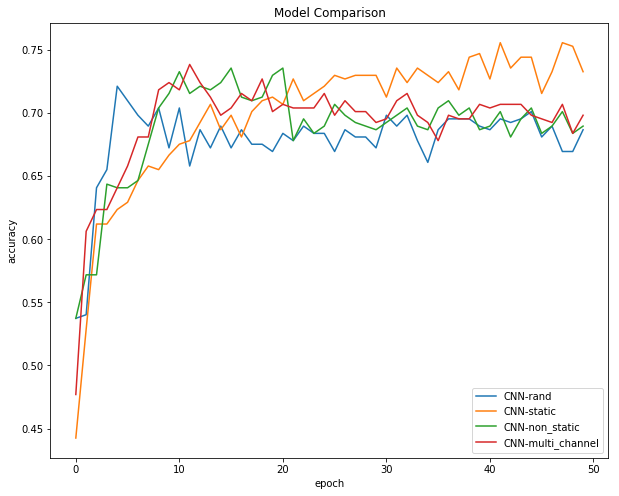

In [351]:
plt.figure(figsize=(10, 8))
#plt.subplot(1, 3, 1)
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history4.history['val_acc'])
plt.title('Model Comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-rand', 'CNN-static','CNN-non_static','CNN-multi_channel'], loc='bottom right')
plt.show();    

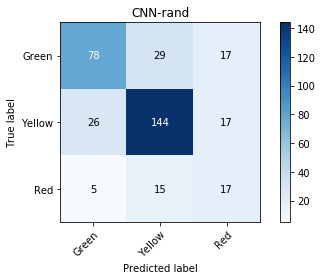

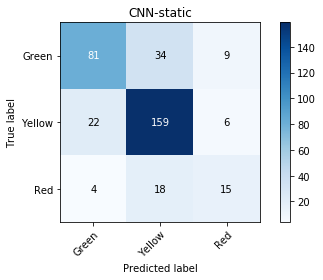

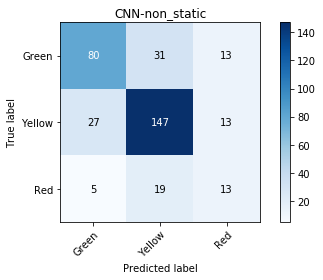

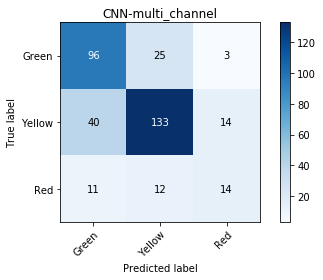

In [352]:
plot_confusion_matrix(y_test, y_pred1, classes=class_names,
                      title='CNN-rand')
plot_confusion_matrix(y_test, y_pred2, classes=class_names,
                      title='CNN-static')
plot_confusion_matrix(y_test, y_pred3, classes=class_names,
                      title='CNN-non_static')
plot_confusion_matrix(y_test, y_pred4, classes=class_names,
                      title='CNN-multi_channel')